In [20]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display, Math

The critical points are [-1.  1.][0.]


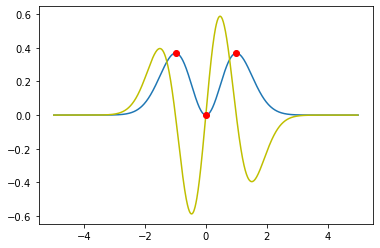

In [2]:
# empiracal method
x = np.linspace(-5,5,1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx) / (x[1]-x[0]) # df/dx: dx is just smallest increment of "x"

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print("The critical points are " + str(x[localmax]) + str(x[localmin]))

plt.plot(x,fx)
plt.plot(x[0:-1],dfx,'y')
plt.plot(x[localmax],fx[localmax],'ro')
plt.plot(x[localmin],fx[localmin],'ro')

plt.show()

In [3]:
# symbolic method
x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)
dfx = sym.diff(fx)

critical_points = sym.solve(dfx) # solve the derivative equation for "x" by setting it equal to 0
# if derivative is equal to 0, then the value of x, in original functions are critical points

print(critical_points)

[-1, 0, 1]


## Exercise

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

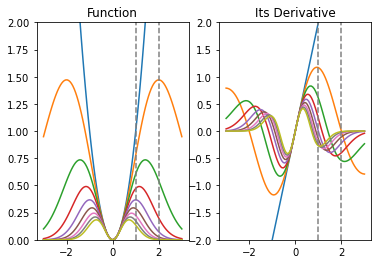

In [40]:
x,a = sym.symbols("x,a")
base_expr = x**2 * sym.exp(-a*x**2)
a_range = np.arange(0,2.25,.25)
x_range = np.linspace(-3,3,100)

# setup the figure
fig,ax = plt.subplots(1,2)

for ai in a_range:
    fx = base_expr.subs(a,ai)
    dfx = sym.diff(fx)
    critical_points = sym.solve(dfx)
    # plotting
    ax[0].plot(x_range,sym.lambdify(x,fx)(x_range))
    ax[1].plot(x_range,sym.lambdify(x,dfx)(x_range))
    # test for the critical points
    if 1 in critical_points:
        display(Math("\\Rightarrow %s \\text{ has a critical point at } x=1" %sym.latex(fx)))
    elif 2 in critical_points:
        display(Math("\\Rightarrow %s \\text{ has a critical point at } x=2" %sym.latex(fx)))
    else: 
        display(Math("\\quad %s \\text{ has NO critical points at x=1, or x=2 }" %sym.latex(fx)))


ax[0].set_ylim([0,2])
ax[0].set_title("Function")
ax[0].plot([1,1],[0,2],'--',color="gray")
ax[0].plot([2,2],[0,2],'--',color="gray")

ax[1].set_ylim([-2,2])
ax[1].set_title("Its Derivative")
ax[1].plot([1,1],[-2,2],'--',color="gray")
ax[1].plot([2,2],[-2,2],'--',color="gray")

plt.show()